In [1]:
import numpy as np
import pandas as pd


iris = pd.read_csv('tableconvert_csv_pyx665.csv')

In [21]:
#ver versión de sklearn
import sklearn
sklearn.__version__

'0.21.3'

In [2]:
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#Analizamos los datos que tenemos disponibles

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Datos estadísticos del dataset

iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Distribución de las especies de Iris

iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

Como podemos observar tenemos 50 datos para cada una de las especies, Iris setosa, Iris versicolor e Iris Virginica.

La gráfica a construir será del tipo dispersión, y vamos a graficar primero los datos correspondientes al sépalo. Colocamos en el eje X los datos de longitud y en el eje Y los datos del ancho, a su vez para cada una de las especies de Iris le colocamos un color. Para los datos del Iris setosa los colocamos de color azul, para el Iris Versicolor será de color verde y para el Iris Virginica colocamos los datos de color rojo.

De igual forma colocamos los nombres correspondientes al eje X y Y y el título de la gráfica y procedemos a graficarlos.

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sépalo - Longitud vs Ancho')

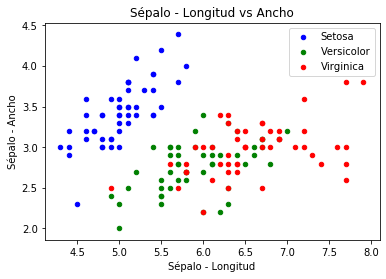

In [9]:
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.variety == 'Setosa'].plot(kind='scatter', x='sepal.length', y='sepal.width', color='blue', label='Setosa')
iris[iris.variety == 'Versicolor'].plot(kind='scatter', x='sepal.length', y='sepal.width', color='green', label='Versicolor', ax=fig)
iris[iris.variety == 'Virginica'].plot(kind='scatter', x='sepal.length', y='sepal.width', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')


Si te fijas en la gráfica los datos están distribuidos de manera casi uniforme sobretodo los correspondientes al Iris setosa, mientras que los correspondientes a versicolor y virginica tienen cualidades algo parecidas por lo que se solapan en ocasiones.

Ahora procedemos a hacer exactamente lo mismo, pero con la información de los pétalos. Si te fijas el código de programación es exactamente el mismo al anterior lo único diferente es que ahora se especifica los datos del pétalo.

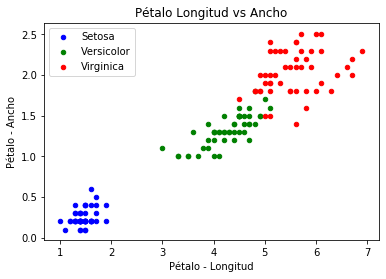

In [10]:
#Grafico Pétalo - Longitud vs Ancho
fig = iris[iris.variety == 'Setosa'].plot(kind='scatter', x='petal.length', y='petal.width', color='blue', label='Setosa')
iris[iris.variety == 'Versicolor'].plot(kind='scatter', x='petal.length', y='petal.width', color='green', label='Versicolor', ax=fig)
iris[iris.variety == 'Virginica'].plot(kind='scatter', x='petal.length', y='petal.width', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()

Acá podemos observar una distribución mucho más uniforme en comparación con el sépalo.

Vamos a trabajar con Regresión Logística, Máquinas de Vectores de Soporte, Vecinos más Cercanos y Árboles de Decisión Clasificación. Recuerda que este es un ejercicio de clasificación por lo que todos los algoritmos a implementar deberán ser para este tipo de problemas.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Acá nos vamos a detener un momento para indicar que en realidad podemos construir varios modelos, el primero de será con todos los datos del dataset, es decir para utilizar este modelo deberás tener la información del sépalo y el pétalo para poderlo utilizar. Pero adicionalmente podemos desarrollar otros dos modelos en donde utilicemos solamente los datos del sépalo y otro con el pétalo. Por lo que al final vamos a tener 3 modelos en total. Adicionalmente, para la construcción de nuestro modelo evaluaremos distintos algoritmos de Machine Learning para encontrar el más adecuado.

Entonces comencemos a construir nuestro primer modelo con todos los datos, lo primero que debemos hacer es separar los datos con las características, que vendrían siendo todas menos la columna de especies, a estos datos los vamos a llamar “X” y los datos con las etiquetas o respuestas que sería la columna de especies vendrían siendo la variable “y”.

In [14]:
X = np.array(iris.drop(['variety'], axis=1))
y = np.array(iris['variety'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos para entrenamiento y 30 datos para prueba


In [18]:
#Ahora si empecemos a aplicar los algoritmos de Machine Learning comenzando con Regresión Logística.

#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Regresión Logística: 0.975


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Máquinas de Vectores de Soporte: 0.9916666666666667


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


El resultado es de 0,991, un valor mucho mejor que el que obtuvimos con el anterior algoritmo.

In [23]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.975


Obtenemos como resultado 0,983, siendo muy parecido al obtenido con el primer algoritmo, por lo que hasta los momentos el modelo obtenido con el algoritmo de Máquinas de Soporte es el mejor.

In [24]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))


Precisión Árboles de Decisión Clasificación: 1.0


Acá el resultado es igual a 1, es decir que se puede decir que este modelo es perfecto, por lo que sería el ideal para realizar las próximas predicciones.

Con esto tenemos un modelo creado con todo el conjunto de datos, ahora vamos a desarrollar y evaluar un nuevo modelo pero esta vez solamente con los datos correspondientes al sépalo, es decir que este modelo solamente evaluara estos datos más no los del pétalo.

Lo primero es definir los datos, como son exclusivamente los del sépalo debemos seleccionar estas columnas, que sería el de la longitud y ancho del sépalo y obviamente la columna correspondiente a la de especies.

In [25]:
sepalo = iris[['sepal.length','sepal.width','variety']]

In [27]:
X_sepalo = np.array(sepalo.drop(['variety'], 1))
y_sepalo = np.array(sepalo['variety'])

In [28]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2)
print('Son {} datos sépalo para entrenamiento y {} datos sépalo para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos sépalo para entrenamiento y 30 datos sépalo para prueba


In [29]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Regresión Logística - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Regresión Logística - Sépalo: 0.7833333333333333


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
algoritmo = SVC()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Máquinas de Vectores de Soporte - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Máquinas de Vectores de Soporte - Sépalo: 0.8083333333333333


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Vecinos más Cercanos - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Vecinos más Cercanos - Sépalo: 0.85


In [32]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Árboles de Decisión Clasificación - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Árboles de Decisión Clasificación - Sépalo: 0.9166666666666666


El resultado es de 0,941, siendo este el mejor de los resultados por lo que este es el mejor modelo de todos.

Ahora desarrollemos el último de los modelos que vamos hacer en este proyecto, para este vamos a utilizar los datos correspondientes al pétalo, tanto longitud como ancho y por supuesto la columna de especies que sería la etiqueta.

In [34]:
petalo = iris[['petal.length','petal.width','variety']]

In [37]:
X_petalo = np.array(petalo.drop(['variety'], axis=1))
y_petalo = np.array(petalo['variety'])

In [38]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petalo, y_petalo, test_size=0.2)
print('Son {} datos pétalo para entrenamiento y {} datos pétalo para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos pétalo para entrenamiento y 30 datos pétalo para prueba


In [39]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Regresión Logística - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Regresión Logística - Pétalo: 0.8583333333333333


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Máquinas de Vectores de Soporte - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Máquinas de Vectores de Soporte - Pétalo: 0.9833333333333333


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Vecinos más Cercanos - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Vecinos más Cercanos - Pétalo: 0.975


In [42]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Árboles de Decisión Clasificación - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Árboles de Decisión Clasificación - Pétalo: 0.9916666666666667


La precisión de este algoritmo es de 0.99, lo cual es el mejor resultado de todos los algoritmos que evaluamos con estos datos.



En conclusión, se construyeron varios modelos con tres conjuntos de datos, siendo el modelo construido con el algoritmo de Árbol de Decisión Clasificación el que obtuvo los mejores resultados en cuanto a la precisión.